# Quetelet - Project 1

### Research Question: Our project is analyzing the demographic and structural shifts in China's economy and population throughout various reform periods in the last 60 years, including the Great Leap Forward, The Reform Period, and the One-Child Policy.

Project Goals: Identify key changes in agriculture, fertility rates, and gdp and population growth during the reform periods.

In [43]:
!pip install pandas numpy matplotlib seaborn wbdata plotly requests

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import wbdata
import requests
from datetime import datetime

In [45]:
%matplotlib inline
pd.options.plotting.backend = "plotly"

In [46]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)
#sns.set_style("whitegrid")
start_year = 1950
end_year = 2025

In [47]:
country_name = "China"
country_code = "CHN"

reform_periods = {"Great Leap Forward": (1958,1962),
                  "Post-Mao Transition": (1976,1978),
                  "Reform Era Start": (1978, 1992),
                  "WTO Entry": (2001, 2005),
                  "One-Child Policy": (1980, 2015)}

In [48]:
indicators = { "NY.GDP.MKTP.CD": "gdp",
               "NY.GDP.PCAP.CD": "gdp_percap",
               "SP.DYN.TFRT.IN": "fertility",
               "SP.POP.TOTL": "pop",
               "SP.POP.GROW": "pop_growth",
               "NV.AGR.TOTL.ZS": "ag_va", #ag as % of GDP
               "SE.PRM.ENRR": "edu_prim"}

In [49]:
def get_wb_data(indicator_dict, country_code, start, end):
    data = wbdata.get_dataframe(indicator_dict,
                                country = country_code,
                                date = (datetime(start, 1, 1), datetime(end, 1, 1)))
    data = data.reset_index()
    data["date"] = data["date"].astype(int)

    return data.sort_values("date")

In [50]:
china_df = get_wb_data(indicators, country_code, start_year, end_year)
china_df.head()

,date,gdp,gdp_percap,fertility,pop,pop_growth,ag_va,edu_prim
64,1960,5.984624e+10,89.715075,4.451,667070000.0,NaN,23.124958,NaN
63,1961,5.016230e+10,75.965501,3.863,660330000.0,-1.015528,35.719491,NaN
62,1962,4.731074e+10,71.061685,6.085,665770000.0,0.820456,38.902722,NaN
61,1963,5.081223e+10,74.468154,7.513,682335000.0,2.457647,39.771365,NaN
60,1964,5.982186e+10,85.661107,6.672,698355000.0,2.320683,37.957493,NaN


### Population Statistics Function

In [85]:
# population function
def china_pop(year):
    indicator = "SP.POP.TOTL"
    data = wbdata.get_data(
    indicator, country = "CHN", date = (str(year), str(year)))

    if data and data[0]["value"] is not None:
        return float(data[0]["value"])
    return None

In [87]:
# fertility function
def china_fert(year):
    indicator = "SP.DYN.TFRT.IN"
    data = wbdata.get_data(
    indicator, country = "CHN", date = (str(year), str(year)))

    if data and data[0]["value"] is not None:
        return float(data[0]["value"])
    return None

In [90]:
china_fert(1962)

6.085

## Population Demographics

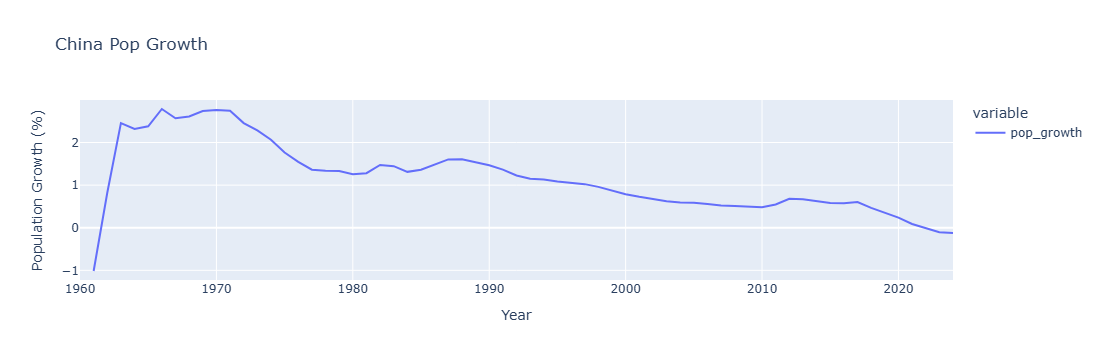

In [51]:
china_df.plot(x = "date", y = ["pop_growth"], title = "China Pop Growth",
             labels = dict(date = "Year", value = "Population Growth (%)"))

In [52]:
#automate adding reform periods to plots
def reform_plot(df, y_col, title, periods = None):

    fig = df.plot(x = "date", y = y_col, title = title)

    if periods is None:
        periods = reform_periods.keys()

    for name in periods:
        start, end = reform_periods[name]
        fig.add_vrect(
            x0 = start,
            x1 = end,
            opacity = 0.12,
            annotation_text = name,
            annotation_position = "top left")

    fig.show()

In [53]:
def reform_plot_multi(df, y_cols, title, periods = None):

    fig = df.plot(x = "date", y = y_cols, title = title)

    if periods is None:
        periods = reform_periods.keys()

    for name in periods:
        start, end = reform_periods[name]
        fig.add_vrect(x0 = start, x1 = end, opacity = 0.10,
                     annotation_text = name,)

    fig.show()

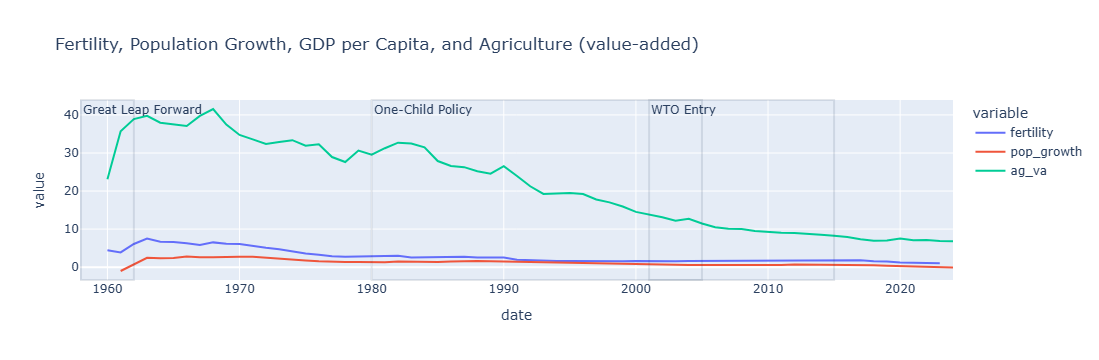

In [54]:
reform_plot(china_df, ["fertility", "pop_growth", "ag_va"], 
            "Fertility, Population Growth, GDP per Capita, and Agriculture (value-added)",
            periods = ["Great Leap Forward", "One-Child Policy", "WTO Entry"])

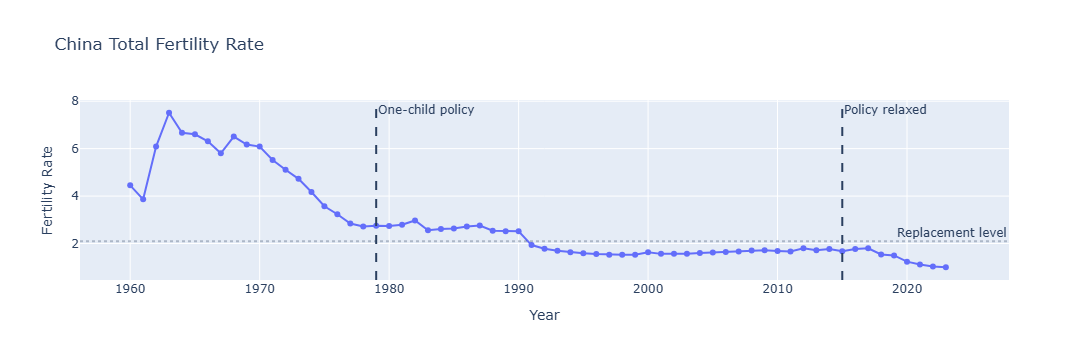

In [79]:
china_df[["date", "fertility"]].head()

fig = px.line(china_df, x = "date", y = "fertility",
              markers = True, title = "China Total Fertility Rate")

fig.update_layout(template = "plotly", xaxis_title = "Year",
                  yaxis_title = "Fertility Rate")

# one-child policy begins in 1979; ends in 2015

fig.add_vline(x = 1979, line_dash = "dash", annotation_text = "One-child policy")
fig.add_vline(x = 2015, line_dash = "dash", annotation_text = "Policy relaxed")

fig.add_hline(y = 2.1, line_dash = "dot", opacity = 0.3, annotation_text = "Replacement level")
fig.show()


High fertility in the pre 1970s, then collapse begins as urbanization and education effects take place plus the one-child policy. Fertility drops below replacement level around 1990. Policy relaxation did not actually reverse the decline, likely due to the structural changes common to countries rapidly developing.

What caused the massive jump in fertility in the early 1960s? Let's find out.

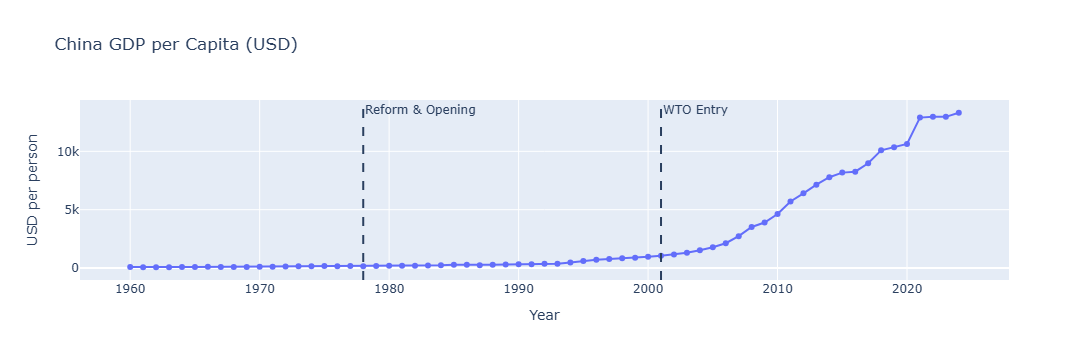

In [80]:
fig = px.line(china_df, x = "date", y = "gdp_percap",
              markers = True, title = "China GDP per Capita (USD)")
fig.update_layout(template = "plotly", xaxis_title = "Year",
                  yaxis_title = "USD per person")

fig.add_vline(x=1978, line_dash="dash", annotation_text="Reform & Opening")
fig.add_vline(x=2001, line_dash="dash", annotation_text="WTO Entry")

fig.show()

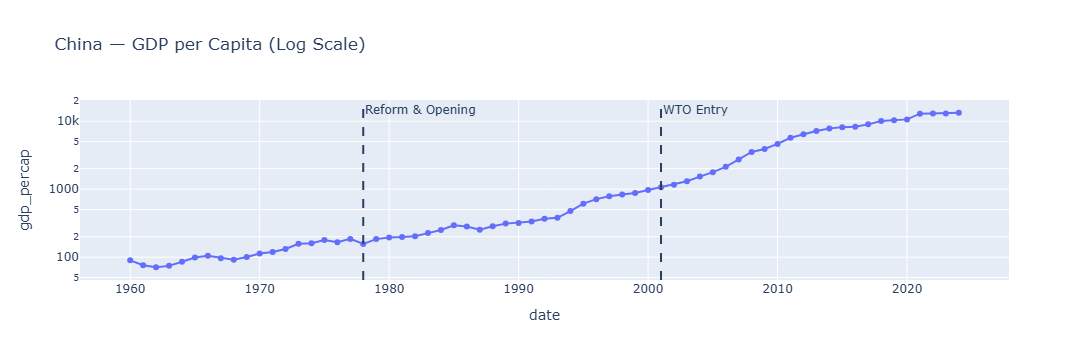

In [81]:
# log scale GDP growth to show jumps
fig_log = px.line(china_df, x = "date", y = "gdp_percap", markers = True,
                  title = "China — GDP per Capita (Log Scale)")

fig_log.update_layout(template = "plotly", yaxis_type = "log")

fig_log.add_vline(x = 1978, line_dash = "dash", annotation_text = "Reform & Opening")
fig_log.add_vline(x = 2001, line_dash = "dash", annotation_text = "WTO Entry")

fig_log.show()

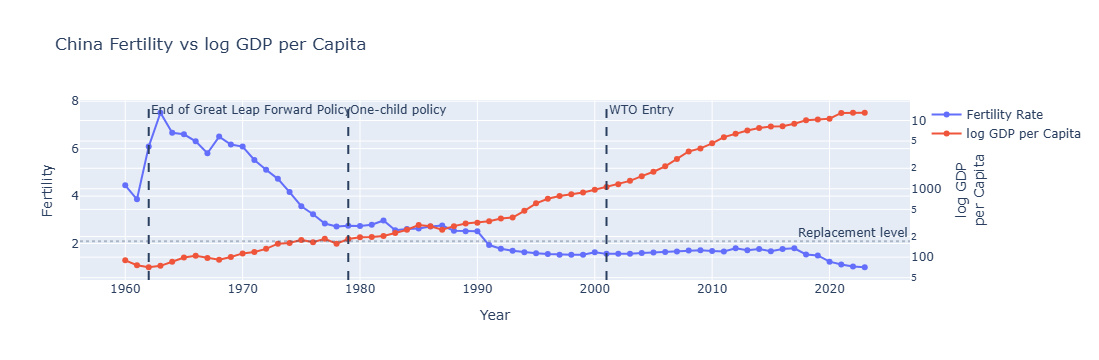

In [57]:
# fertility vs LOG gdp per cap

df = china_df.dropna(subset = ["fertility", "gdp_percap"]).copy()

import plotly.graph_objects as go
fig = go.Figure()

# fertility on left axis
fig.add_trace(go.Scatter(x = df["date"], y = df["fertility"],
                         name = "Fertility Rate", mode = "lines+markers"))
# gdp per capita on right axis
fig.add_trace(go.Scatter(x = df["date"], y = df["gdp_percap"],
                         name = "log GDP per Capita", mode = "lines+markers",
                         yaxis = "y2"))

fig.update_layout(title = "China Fertility vs log GDP per Capita",
                  xaxis_title = "Year",
                  yaxis = dict(title = "Fertility"),
                  yaxis2 = dict(title = "log GDP<br>per Capita",
                                overlaying = "y",
                                side = "right", type = "log"),
                  template = "plotly")

fig.add_vline(x = 1962, line_dash = "dash", annotation_text = "End of Great Leap Forward Policy")
fig.add_vline(x = 1979, line_dash = "dash", annotation_text = "One-child policy")
fig.add_vline(x = 2001, line_dash = "dash", annotation_text = "WTO Entry")
fig.add_hline(y = 2.1, line_dash = "dot", opacity = 0.3, annotation_text = "Replacement level")

fig.show()

In Lecture 1, we discussed the inverse relationship between a country's wealth and fertility. The graph above affirms what we learned about Fact 2: Women in poorer countries have higher fertility.

Falling fertility generally coincides with rising productivity and income. Notice that the economic takeoff happens most significantly after WTO entry and below replacement level fertility.
The log graph better shows the relationship b/w fertility and gdp per cap, with a more linear increase that better coincides with the decrease in fertility.

As you can see, the massive jump in fertility in 1962 coincided with the end of the the Great Leap Forward Policies and subsequently, the end of the worst effects of the Great Famine. The fertility rate rebounded after a massive crash during the famine, overshot, then stabilized around 5.5-6 before starting to drop as GDP per capita increased.

### China's GDP Per Capita Growth (Smoothed over 5-year average)

In [58]:
china_df = china_df.sort_values("date")

In [59]:
china_df["gdp_pc_growth"] = china_df["gdp_percap"].pct_change()*100
china_df["pop_growth_change"] = china_df["pop_growth"].diff()
china_df["fertility_change"] = china_df["fertility"].diff()
china_df["ag_va_change"] = china_df["ag_va"].diff()

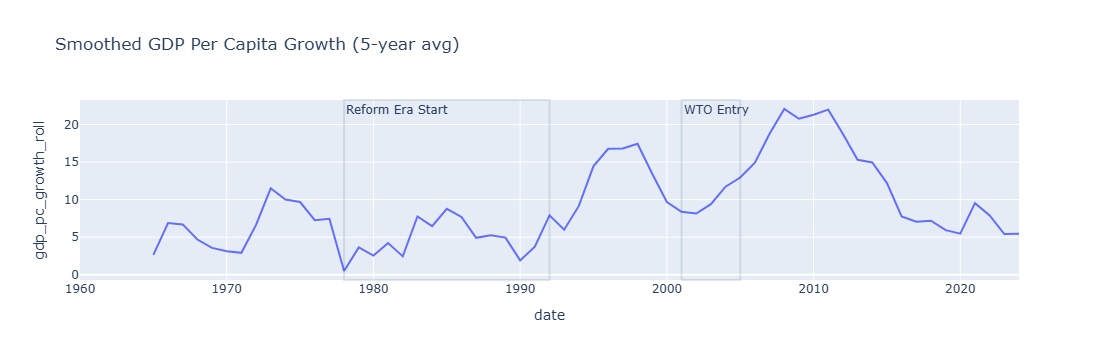

In [60]:
china_df["gdp_pc_growth_roll"] = china_df["gdp_pc_growth"].rolling(5).mean()
china_df["fertility_roll"] = china_df["fertility"].rolling(5).mean()
reform_plot(china_df, "gdp_pc_growth_roll", "Smoothed GDP Per Capita Growth (5-year avg)",
            periods = ["Reform Era Start", "WTO Entry"])

### Population Growth Rate Changes: Before, During, and After Transition Periods

In [61]:
def period_stats(df, col, start, end, window = 5):
    before = df[(df.date >= start-window) & (df.date < start)][col].mean()
    during = df[(df.date >= start) & (df.date <= end)][col].mean()
    after = df[(df.date > end) & (df.date <= end+window)][col].mean()

    return before, during, after

In [62]:
# Population growth rate before, during, and after periods change by value
popgrowth = []

for name, (start, end) in reform_periods.items():
    b, d, a = period_stats(china_df, "pop_growth", start, end)

    popgrowth.append({"period": name,
                    "before": b,
                    "during": d,
                    "after": a})
pd.DataFrame(popgrowth)

,period,before,during,after
0,Great Leap Forward,NaN,-0.097536,2.503546
1,Post-Mao Transition,2.264003,1.416100,1.357345
2,Reform Era Start,1.805172,1.406013,1.087596
3,WTO Entry,0.936990,0.640260,0.514675
4,One-Child Policy,1.469724,0.981854,0.447750


Notice that during the Great Leap Forward, the population growth rate decreased as the famine increased mortality rates.

### Population Pyramids

In [64]:
chunks = []

for chunk in pd.read_csv(
        "WPP2024_Population1JanuaryBySingleAgeSex_Medium_1950-2023.csv.gz",
        compression="gzip",
        chunksize=200000
    ):

    china_chunk = chunk[chunk["Location"].str.contains("China", na=False)]
    chunks.append(china_chunk)

pop_age = pd.concat(chunks)

/tmp/ipykernel_1343/1801361086.py:3: DtypeWarning:

Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_1343/1801361086.py:3: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_1343/1801361086.py:3: DtypeWarning:

Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.



In [66]:
# filter out projection variants
china = pop_age[(pop_age["ISO3_code"] == "CHN") &
                (pop_age["Variant"] == "Medium")].copy()

In [67]:
# choosing years based on reforms
years = [1960, 1980, 2000, 2020]
china = china[china["Time"].isin(years)]

In [68]:
# need to make male/female long format for pop pyramid
pyr = china[["Time", "AgeGrp", "PopMale", "PopFemale"]].copy()

pyr = pyr.rename(columns = {"Time": "year",
                            "AgeGrp": "age_group"})

pyr_long = pyr.melt(id_vars = ["year", "age_group"],
                    value_vars = ["PopMale", "PopFemale"],
                    var_name = "sex",
                    value_name = "pop")

pyr_long["sex"] = pyr_long["sex"].str.replace("Pop", "")

In [69]:
# male values negative for left side
pyr_long["pop_plot"] = pyr_long["pop"]
pyr_long.loc[pyr_long["sex"] == "Male", "pop_plot"] *= -1

In [74]:
import plotly.express as px

def plot_pyramid(year):
    d = pyr_long[pyr_long["year"] == year]

    fig = px.bar(d, x = "pop_plot", y = "age_group", color = "sex",
                    orientation = "h",
                    title = f"China Population Pyramid - {year}",
                    hover_data = ["pop"])

    fig.update_layout(
        template = "plotly",
        xaxis_title = "Population",
        yaxis_title = "Age Group",
        barmode = "overlay")
    fig.show()

In [71]:
plot_pyramid(1960)
# wide at the base shows very high fertility
# this is pre-reform demographics

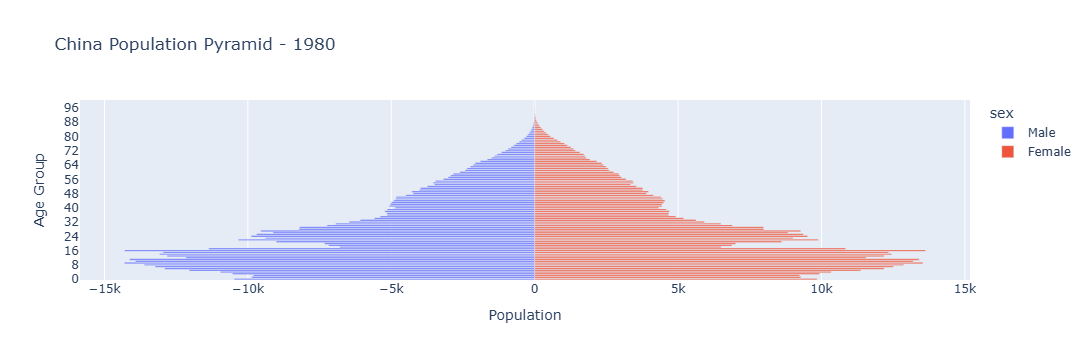

In [72]:
plot_pyramid(1980)
# one child policy starts -> base gets narrower and bulge moves up
# shows fertility is decreasing

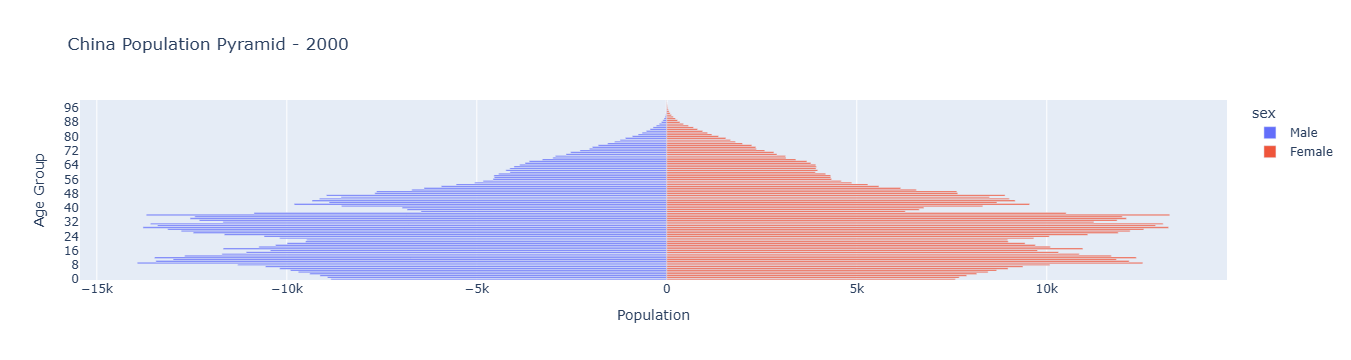

In [37]:
plot_pyramid(2000)
# bulge now at the working age shows increasing lower fertility
# reform period

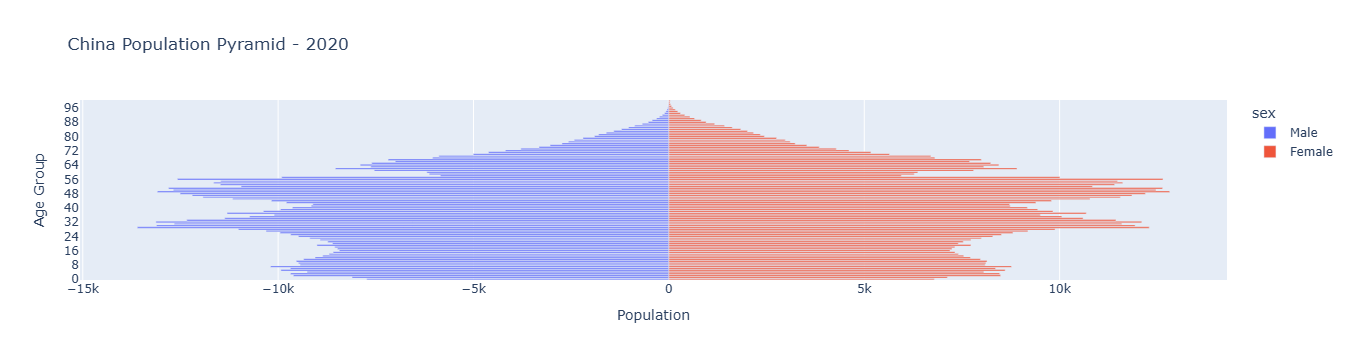

In [38]:
plot_pyramid(2020)
# population starts aging out as fertility rate stays below 2
# dependency of older population on younger population

## Sectoral Changes

In [75]:
china_df = china_df.sort_values("date")

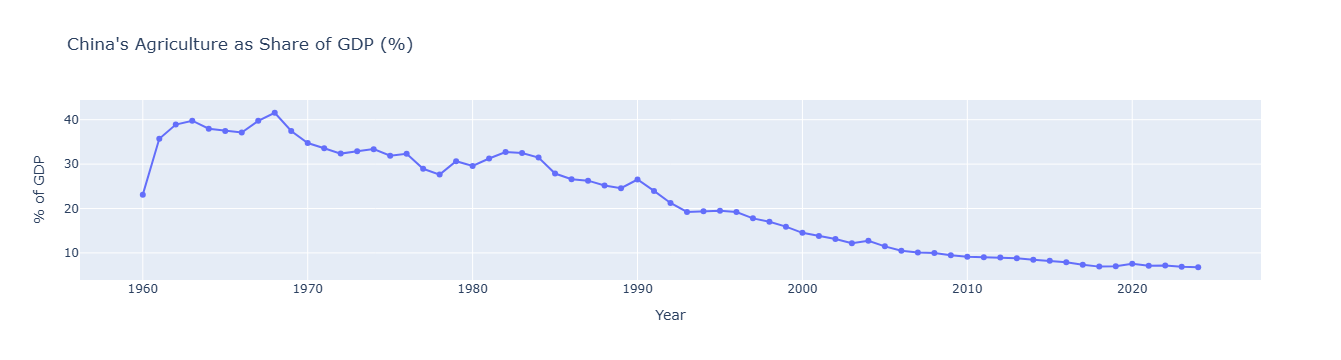

In [73]:
fig = px.line(china_df, x = "date", y = "ag_va",
              title = "China's Agriculture as Share of GDP (%)",
              markers = True)

fig.update_layout(
    template = "plotly",
    xaxis_title = "Year",
    yaxis_title = "% of GDP")
fig.show()

In [75]:
# urbanization and rural -> urban migration
indicators["SP.URB.TOTL.IN.ZS"] = "urban_pct"

china_df = get_wb_data(indicators, country_code, start_year, end_year)
china_df = china_df.sort_values("date")

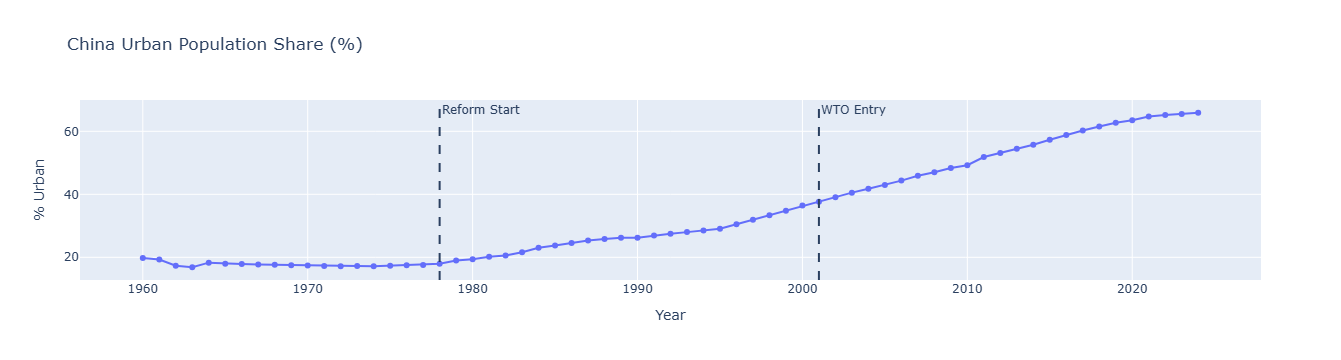

In [76]:
fig = px.line(china_df, x = "date", y = "urban_pct", markers = True,
              title = "China Urban Population Share (%)")
fig.update_layout(template = "plotly", xaxis_title = "Year",
                  yaxis_title = "% Urban")
fig.add_vline(x=1978, line_dash="dash", annotation_text="Reform Start")
fig.add_vline(x=2001, line_dash="dash", annotation_text="WTO Entry")

fig.show()

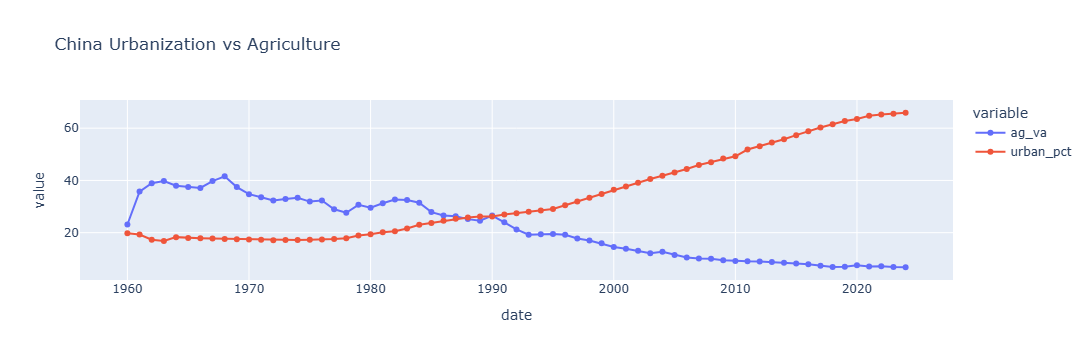

In [76]:
px.line(china_df, x = "date", y = ["ag_va", "urban_pct"], markers = True,
        title = "China Urbanization vs Agriculture").show()

As the economy shifted away from the agrarian policies forced during the Great Leap Forward, agriculture value-added decreased while urbanization increased. This changing relationship coincides with the drop in fertility and rise in GDP per capita that we saw previously.

### Unit Testing

In [98]:
# years ordered correctly
assert china_df["date"].is_monotonic_increasing, "Years are not sorted"

# population numbers make sense
assert (china_df["pop"] >= 0).all(), "Negative population found"
assert (china_df["pop"] > 0).all(), "Zero population found"

# pop pyramid gender checks
assert (china["PopMale"] >= 0).all(), "Negative male population found"
assert (china["PopFemale"] >= 0).all(), "Negative female population found"
assert (china["PopTotal"] >= 0).all(), "Negative total population found"

# total male + female check
diff = china["PopMale"] + china["PopFemale"] - china["PopTotal"]
assert (diff.abs() < 1e-6).all(), "Male + Female ≠ Total"

# gdp check
assert (china_df["gdp_percap"] > 0).all(), "Bad GDP per capita values"